# 4. Multinomial NB and Tree with Tweet Text

**Author:** Tori Stiegman   
**Project:** Gender-Inclusive Language in Tweets about Menstruation: Capstone Edition                       
**Date turned in:** Dec 19, 2022                                                               
**Updated:** Mar 1, 2023

**About this notebook:** In this notebook I will train and test a Multinomial Naive Bayes classifier and a Decision Tree on a datasets that only include the clean tweet text. They will both be able to label tweets as gender- "inclusive," "exclusive," or "neither."

**Table of Contents**
1. [Import and Format Data](#data)
    1. [Make Test Set](#testSet)
    2. [Format Data](#format)
2. [Vectorize training set](#vector)
3. [Create a classifier instance](#classifier)
4. [Fit the classifier](#fit)
5. [Make predictions](#predict)
    1. [Test dataset](#test)
    2. [Full dataset](#full)

In [171]:
import pandas as pd

# get rid of warnings pls
import warnings
warnings.filterwarnings('ignore')

<a name="data"></a>
## Import and Format Data

Here I will import my training dataset, `train_clean.csv`, and my testing dataset, `test_clean.csv`.

I will then format my training data into lists that the model can be trained on. 

### Load in Training Set

In [60]:
pd.set_option('display.max_colwidth', -1)
labeled = pd.read_csv("train_clean.csv")

In [100]:
# labeled.head(20)

In [64]:
labeled["label"].value_counts()

neither      143
exclusive    73 
inclusive    64 
Name: label, dtype: int64

<a name="testSet"></a>
### Load in Test Set


In [65]:
dfTestFull = pd.read_csv("test_clean.csv")

In [66]:
dfTestFull["label"].value_counts()

neither      24
exclusive    16
inclusive    16
Name: label, dtype: int64

In [ ]:
y_test = dfTestFull.label.values.tolist()

<a name="format"></a>
### Format data

`X` = a list of tweet text data... will become `X_train` once it is vectorized... 

`y_train` = a list of labels correlating to certain items in `X`

In [67]:
X = labeled['text_clean'].tolist()

In [68]:
y_train = labeled['label'].tolist()

<a name="vector"></a>
### Vectorize Data in Training and Testing Datasets

Here I will turn all of the tweets into a "bag of words." This vector will contain how many instances there are of each word in the dataset to create a full vocabulary. 

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [168]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X)

test1 = dfTestFull['text_clean'].fillna(' ').tolist()
X_test = vectorizer.transform(test1)

`X_train` is a matrix of size 280x1703.

This means that there are 280 Tweets, with a vocabulary size of 1703 words.

The next piece of code will show the vocabulary. 

In [71]:
# vectorizer.get_feature_names()

________________________

<a name="classifier"></a>
## Create and Fit Multinomial Naive Bayes Classifier Instance

In [72]:
from sklearn.naive_bayes import MultinomialNB

In [73]:
# create classifier instance
classifier = MultinomialNB()

In [74]:
# fit the classifier on the training data
classifier.fit(X_train, y_train)

MultinomialNB()

### What is the classifier doing?

In [75]:
# show the class names that it has learned
classifier.classes_

array(['exclusive', 'inclusive', 'neither'], dtype='<U9')

In [76]:
# show how many instances for each class
classifier.class_count_

array([ 73.,  64., 143.])

In [77]:
# show total number of features for each class
classifier.feature_count_

array([[0., 2., 0., ..., 0., 3., 0.],
       [0., 1., 0., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 3., 0.]])

In [78]:
# show the conditional log probabilities for each feature
classifier.feature_log_prob_

array([[-8.05134093, -6.95272864, -8.05134093, ..., -8.05134093,
        -6.66504657, -8.05134093],
       [-7.99631723, -7.30317005, -7.99631723, ..., -7.30317005,
        -7.30317005, -7.30317005],
       [-7.56294095, -8.25608813, -7.56294095, ..., -7.56294095,
        -6.86979377, -8.25608813]])

### Predict Labels for the Test Set

In [166]:
y_pred = classifier.predict(X_test)

dfTestFull['predicted_label'] = y_pred

### Calculate Accuracy, Sensitivity and Specificity from Confusion Matrix

#### Confusion Matrix
First, I'll create a confusion matrix:

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [172]:
cmNB = confusion_matrix(
        y_test, y_pred, labels = ['exclusive', 'inclusive', 'neither'])
print("Naive Bayes Confusion Matrix:\n" + str(cmNB))

Naive Bayes Confusion Matrix:
[[10  3  3]
 [ 2  7  7]
 [ 0  2 22]]


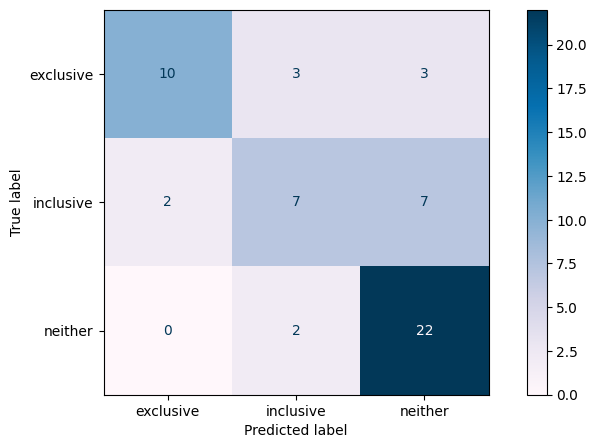

In [185]:
# a nicer version of the confusion matrix
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cmNB,
                              display_labels=['exclusive', 'inclusive', 'neither'])
disp_tree.plot(cmap = 'PuBu')

#### Accuracy

Next I'll calculate the accuracy.

> accuracy = total correct predictions / total predictions

In [158]:
acc_score_tree = accuracy_score(y_test, y_pred)
print("Accuracy Score: " + str(acc_score_tree))

Accuracy Score: 0.6964285714285714


#### Sensitivity

> sensitivity = (true positives)/(true positives + false negatives)

In [159]:
# Define a helper function 

def sensitivity(tp, fn, label):
    print(label + " Sensitivity: " + str(tp/(tp+fn)))

In [169]:
# Define the true positive and true negative values for each label

# exclusive
tp_ex_nb = cmNB[0][0] # should be 12
fn_ex_nb = cmNB[0][1] + cmNB[0][2]

# inclusive
tp_in_nb = cmNB[1][1]
fn_in_nb = cmNB[1][0] + cmNB[1][2]

# neither
tp_ne_nb = cmNB[2][2]
fn_ne_nb = cmNB[2][0] + cmNB[2][1]

In [170]:
sensitivity(tp_ex_nb, fn_ex_nb, "'Exclusive'")
sensitivity(tp_in_nb, fn_in_nb, "'Inclusive'")
sensitivity(tp_ne_nb, fn_ne_nb, "'Neither'")

'Exclusive' Sensitivity: 0.625
'Inclusive' Sensitivity: 0.4375
'Neither' Sensitivity: 0.9166666666666666


Based on this Confusion Matrix, the sensitivity, or true positive rate, was the highest for the "neither" category (0.92), and the lowest for the "inclusive" category (0.438). This means this tree model based on the text of the tweets identified 92% of the "Neither" cases in the test data set, 62.5% of the "exclusive cases" and 43.8% of the "Inclusive" cases. 

#### Specificity

> specificity = tn / (tn + fp)

In [162]:
# Define a helper function

def specificity(tn, fp, label):
    print(label + " Sensitivity: " + str(tn/(tn+fp)))

In [163]:
# Define the true negative and false positive values for each label

# exclusive
tn_ex_nb = sum(cmNB[1] + cmNB[2])
fp_ex_nb = cmNB[1][0] + cmNB[2][0]

# inclusive
tn_in_nb = sum(cmNB[0] + cmNB[2])
fp_in_nb = cmNB[0][1] + cmNB[2][1] 

# neither
tn_ne_nb = sum(cmNB[0] + cmNB[1])
fp_ne_nb = cmNB[0][2] + cmNB[1][2]

In [164]:
specificity(tn_ex_nb, fp_ex_nb, "'Exclusive'")
specificity(tn_in_nb, fp_in_nb, "'Inclusive'")
specificity(tn_ne_nb, fp_ne_nb, "'Neither'")

'Exclusive' Sensitivity: 0.9523809523809523
'Inclusive' Sensitivity: 0.8888888888888888
'Neither' Sensitivity: 0.7619047619047619


The specificity of this tree model based on the tweet text was very high for the "exclusive" (0.95) and "inclusive" (0.889) categories and moderately hight for the "neither" (0.76) categroy. This means this decision tree was able to identify 95% of the tweets that did _not_ contain exclusive language, 88.9% of the tweets that did _not_ contain inclusive language and 76% of the tweets that did contain either exclusive or inclusive langague (i.e. did not contain words that would have earned it a "neither" label). 

-------------------------------------------------

## Decision Tree with Tweet Text

In [101]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [102]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
from sklearn.tree import DecisionTreeClassifier

# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 50, 
                             random_state = 0)

# Step 3: Train the model on the data
clf.fit(X_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
y_pred_tree = clf.predict(X_test)

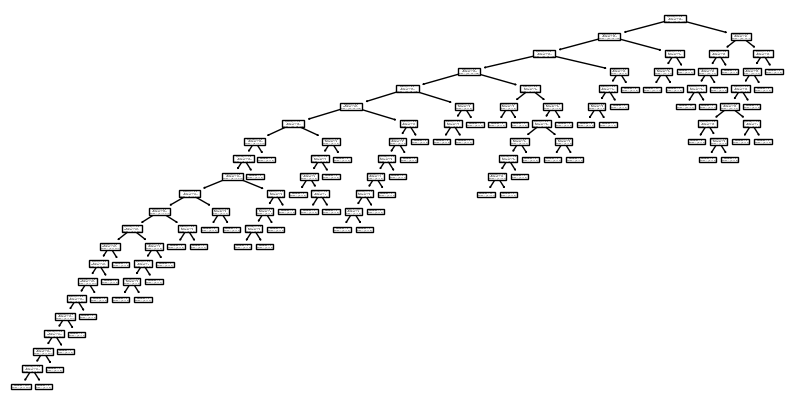

In [120]:
plt.rcParams['figure.figsize'] = [10, 5]
fig = clf.fit(X_train,y_train)
tree.plot_tree(fig)
plt.show()

### Calculate Accuracy, Sensitivity and Specificity from Confusion matrix

#### Confusion Matrix
First, I'll create a confusion matrix:

In [155]:
cmTree = confusion_matrix(
        y_test, y_pred_tree, labels = ['exclusive', 'inclusive', 'neither'])
print("Confusion Matrix:\n" + str(cmTree))

Confusion Matrix:
[[12  1  3]
 [ 0 10  6]
 [ 0  1 23]]


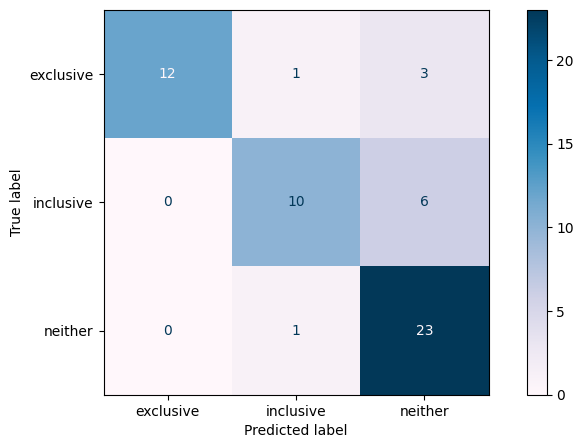

In [186]:
# a nicer version of the confusion matrix
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cmTree,
                              display_labels=['exclusive', 'inclusive', 'neither'])
disp_tree.plot(cmap = 'PuBu')

#### Accuracy

Next I'll calculate the accuracy.

> accuracy = total correct predictions / total predictions

In [113]:
acc_score_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Score: " + str(acc_score_tree))

Accuracy Score: 0.8035714285714286


#### Sensitivity

> sensitivity = (true positives)/(true positives + false negatives)

In [123]:
# Define a helper function 

def sensitivity(tp, fn, label):
    print(label + " Sensitivity: " + str(tp/(tp+fn)))

In [145]:
# Define the true positive and true negative values for each label

# exclusive
tp_ex_tree = cmTree[0][0] # should be 12
fn_ex_tree = cmTree[0][1] + cmTree[0][2]

# inclusive
tp_in_tree = cmTree[1][1]
fn_in_tree = cmTree[1][0] + cmTree[1][2]

# neither
tp_ne_tree = cmTree[2][2]
fn_ne_tree = cmTree[2][0] + cmTree[2][1]

In [146]:
sensitivity(tp_ex_tree, fn_ex_tree, "'Exclusive'")
sensitivity(tp_in_tree, fn_in_tree, "'Inclusive'")
sensitivity(tp_ne_tree, fn_ne_tree, "'Neither'")

'Exclusive' Sensitivity: 0.75
'Inclusive' Sensitivity: 0.625
'Neither' Sensitivity: 0.9583333333333334


Based on this Confusion Matrix, the sensitivity, or true positive rate, was the highest for the "neither" category (0.96), and the lowest for the "inclusive" category (0.625). This means this tree model based on the text of the tweets identified 95% of the "Neither" cases in the test data set, 75% of the "exclusive cases" and 62.5% of the "Inclusive" cases. 

#### Specificity

> specificity = tn / (tn + fp)

In [133]:
# Define a helper function

def specificity(tn, fp, label):
    print(label + " Sensitivity: " + str(tn/(tn+fp)))

In [144]:
# Define the true negative and false positive values for each label

# exclusive
tn_ex_tree = sum(cmTree[1] + cmTree[2])
fp_ex_tree = cmTree[1][0] + cmTree[2][0]

# inclusive
tn_in_tree = sum(cmTree[0] + cmTree[2])
fp_in_tree = cmTree[0][1] + cmTree[2][1] 

# neither
tn_ne_tree = sum(cmTree[0] + cmTree[1])
fp_ne_tree = cmTree[0][2] + cmTree[1][2]

In [147]:
specificity(tn_ex_tree, fp_ex_tree, "'Exclusive'")
specificity(tn_in_tree, fp_in_tree, "'Inclusive'")
specificity(tn_ne_tree, fp_ne_tree, "'Neither'")

'Exclusive' Sensitivity: 1.0
'Inclusive' Sensitivity: 0.9523809523809523
'Neither' Sensitivity: 0.7804878048780488


The specificity of this tree model based on the tweet text was very high for the "exclusive" (1.0) and "inclusive" (0.95) categories and moderately hight for the "neither" (0.78) categroy. This means this decision tree was able to identify 100% of the tweets that did _not_ contain exclusive language, 95% of the tweets that did _not_ contain inclusive language and 78% of the tweets that did contain either exclusive or inclusive langague (i.e. did not contain words that would have earned it a "neither" label). 

<a name="full"></a>
### Vectoroize and Predict Full Dataset

As I have and will prove in this notebook and the following notebook, this decision tree trained just on the tweet text seems to be the best model. It has the highest overall accuracy, the highest sensitivity for the "exclusive" and "neither" label (the Multinomial Naive Bayes trained with tweet text, date and like count had the highest sensitivity for the "inclusive" label; sensitivity = 0.6875) and the highest specificity for the "exclusive" label and the "inclusive label (the Multinomial Naive Bayes trained with tweet text, date and like count had the highest sensitivity for the "inclusive" label; specificity = 0.842). Thus, I will use it to label the rest of the tweets in my dataset for analysis.

#### Load Data

In [173]:
allTweets = pd.read_csv("fullTwitter_clean.csv")

In [174]:
# allTweets.head()

#### Vectorize

In [175]:
test = allTweets['text_clean'].fillna(' ').tolist()
testVector = vectorizer.transform(test)

#### Make Predictions

In [176]:
testLabels = clf.predict(testVector)

allTweets['predicted_label'] = testLabels

#### Probe Task

In [177]:
probe = classifier.predict_proba(testVector)
probe = probe.tolist()
allTweets['probe'] = probe

In [178]:
# allTweets[allTweets["predicted_label"] == "neither"]

In [179]:
# allTweets[allTweets["predicted_label"] == "inclusive"]

In [180]:
# allTweets[allTweets["predicted_label"] == "exclusive"]

#### Export
Export labeled Full dataset to a csv, `allTweets_labeled.csv`

In [181]:
allTweets.to_csv('allTweets_labeled.csv', index = False, header = True)